Logan Pickell   
Artificial Intelligence   
CPSC 4383   
Project 2
Parkinson's Disease Through Voice Data

---




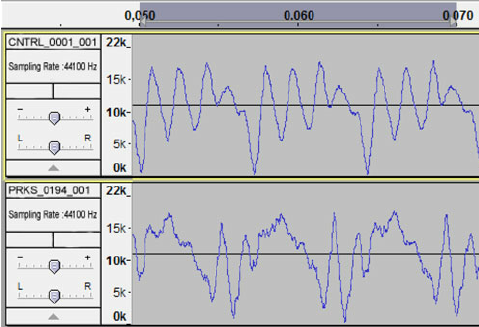

Waveform of a voice sample belonging to a person with Parkinson's Disease (bottom) and a
healthy individual (top). Amplitude of the signal (y-axis) is plotted against time
duration (x-axis)

# Acquire the Data

In [ ]:
!wget "https://raw.githubusercontent.com/sumitpundir/Verification-of-Parkinson-s-Disease-through-Voice-Data/master/parkinsons.csv"

--2023-10-09 17:52:14--  https://raw.githubusercontent.com/sumitpundir/Verification-of-Parkinson-s-Disease-through-Voice-Data/master/parkinsons.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40697 (40K) [text/plain]
Saving to: ‘parkinsons.csv’

parkinsons.csv      100%[===================>]  39.74K  --.-KB/s    in 0.001s  

2023-10-09 17:52:14 (32.9 MB/s) - ‘parkinsons.csv’ saved [40697/40697]



# Read CSV, Scale data

In [ ]:
#Read CSV, rearrage data

import pandas as pd
import numpy as np
import os, sys

data = pd.read_csv('parkinsons.csv')

print(data.head(2))

predictors = data.drop(['name'], axis = 1)
predictors = predictors.drop(['status'], axis = 1).values
target = data['status']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1, 1))
X = scaler.fit_transform(predictors)
Y = target




             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  

[2 rows x 24 columns]


# XGBoost Model

In [ ]:
#XGBoost (96%!)
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .25, random_state = 7)


#fit data to XGBoost
model = XGBClassifier()
model.fit(X_train, Y_train)

#summarize the fit of the model
y_pred = model.predict(X_test)
print("XGB boost:")
print(metrics.accuracy_score(Y_test, y_pred))
print(metrics.classification_report(Y_test, y_pred))
print(metrics.confusion_matrix(Y_test, y_pred))

XGB boost:
0.9591836734693877
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.95      1.00      0.97        39

    accuracy                           0.96        49
   macro avg       0.98      0.90      0.93        49
weighted avg       0.96      0.96      0.96        49

[[ 8  2]
 [ 0 39]]


# Logistic Regression Model

In [ ]:
# Logistic Regression
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
# fit a logistic regression model to the data
model = LogisticRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
# summarize the fit of the model
print("Logistic Regression: ")
print(metrics.accuracy_score(Y_test, y_pred))
print(metrics.classification_report(Y_test, y_pred))
print(metrics.confusion_matrix(Y_test, y_pred))

Logistic Regression: 
0.8775510204081632
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.90      0.95      0.92        39

    accuracy                           0.88        49
   macro avg       0.83      0.77      0.80        49
weighted avg       0.87      0.88      0.87        49

[[ 6  4]
 [ 2 37]]


# Gaussian Naive Bayes Model

In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train)
# make predictions
y_pred = model.predict(X_test)
# summarize the fit of the model
print("Gaussian Naive Bayes:")
print(metrics.accuracy_score(Y_test, y_pred))
print(metrics.classification_report(Y_test, y_pred))
print(metrics.confusion_matrix(Y_test, y_pred))

Gaussian Naive Bayes:
0.6938775510204082
              precision    recall  f1-score   support

           0       0.38      0.80      0.52        10
           1       0.93      0.67      0.78        39

    accuracy                           0.69        49
   macro avg       0.65      0.73      0.65        49
weighted avg       0.82      0.69      0.72        49

[[ 8  2]
 [13 26]]


# K-Nearest Neighbor Model (Most Accurate-98%)

In [ ]:
#K-Nearest Neighbor (BEST ONE 98%%)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
# make predictions
y_pred = model.predict(X_test)
# summarize the fit of the model
print("k-Nearest Neighbor: ")
print(metrics.accuracy_score(Y_test, y_pred))
print(metrics.classification_report(Y_test, y_pred))
print(metrics.confusion_matrix(Y_test, y_pred))

k-Nearest Neighbor: 
0.9795918367346939
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.97      1.00      0.99        39

    accuracy                           0.98        49
   macro avg       0.99      0.95      0.97        49
weighted avg       0.98      0.98      0.98        49

[[ 9  1]
 [ 0 39]]


# Support Vector Machine Model

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, Y_train)

# make predictions
y_pred = model.predict(X_test)
# summarize the fit of the model
print("Support Vector Machine: ")
print(metrics.accuracy_score(Y_test, y_pred))
print(metrics.classification_report(Y_test, y_pred))
print(metrics.confusion_matrix(Y_test, y_pred))

Support Vector Machine: 
0.8979591836734694
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.89      1.00      0.94        39

    accuracy                           0.90        49
   macro avg       0.94      0.75      0.80        49
weighted avg       0.91      0.90      0.88        49

[[ 5  5]
 [ 0 39]]


#Classification Regression Trees Model

In [ ]:
# Classification and Regression Trees
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
# make predictions
y_pred = model.predict(X_test)
# summarize the fit of the model
print("Classification and Regression Trees")
print(metrics.accuracy_score(Y_test, y_pred))
print(metrics.classification_report(Y_test, y_pred))
print(metrics.confusion_matrix(Y_test, y_pred))

Classification and Regression Trees
0.9591836734693877
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        39

    accuracy                           0.96        49
   macro avg       0.94      0.94      0.94        49
weighted avg       0.96      0.96      0.96        49

[[ 9  1]
 [ 1 38]]
